In [3]:
import matplotlib.pyplot as plt
import numpy as np

NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

class Bandit:
    def __init__(self, p):
        self.p = p
        self.p_estimate = 0
        self.N = 0

    def pull(self):
        return np.random.random() < self.p

    def update(self, x):
        self.N = self.N + 1
        self.p_estimate = self.p_estimate + (1/self.N) * (x - self.p_estimate)

In [8]:
def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

    rewards = np.zeros(NUM_TRIALS)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0
    optimal_j = np.argmax([b.p for b in bandits])
    print("optimal j:", optimal_j)

    for i in range(NUM_TRIALS):
        # use epsilon-greedy to select the next bandit
        if np.random.random() < EPS:
            num_times_explored += 1
            j = np.random.randint(0, len(bandits))
        else:
            num_times_exploited += 1
            j = np.argmax([b.p_estimate for b in bandits])
        if j == optimal_j:
            num_optimal += 1

        x = bandits[j].pull()
        
        rewards[i] = x

        bandits[j].update(x)
    
    for b in bandits:
        print("mean estimate:", b.p_estimate)

    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRIALS)
    print("num_times_explored:", num_times_explored)
    print("num_timnes_exploited:", num_times_exploited)
    print("num times selected optimal bandit:", num_optimal)

    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS) * np.max(BANDIT_PROBABILITIES))
    plt.show()


optimal j: 2
mean estimate: 0.18230563002680972
mean estimate: 0.530791788856305
mean estimate: 0.7476846866250255
total reward earned: 7192.0
overall win rate: 0.7192
num_times_explored: 997
num_timnes_exploited: 9003
num times selected optimal bandit: 9286


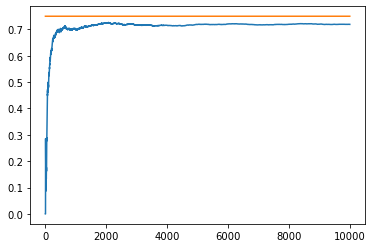

In [9]:
experiment()